# Visualization Exercise Sheet

----------------------------------------------------------

In these short questions we will have you work with data from the GALAH spectroscopic survey (https://www.galah-survey.org) of stars in the Milky Way disk, and practice some visualization techniques to help analyze trends in the data.

You will find helpful documentation and examples to help you make the plots at the following graph galleries.
https://python-graph-gallery.com

https://matplotlib.org/stable/plot_types/index.html

**Download the data file 'galahamr.sav' located in the Moodle exercises page, which contains measurements of physical properties of ~7000 nearby stars.**

In [141]:
import numpy as np
from matplotlib import pyplot as plt

In [142]:
#Read in data set
from scipy.io import readsav
filepath = 'galahamr.sav'  #change this to the path on your computer where the file is stored
stars = readsav(filepath)  

In [143]:
#Pull out some attributes of the stars we want to look at and store them in arrays
logg = stars['f']['logg']  #surface gravity   
teff = stars['f']['teff']  #effective temperature
mass = stars['f']['massmean']  #mass
lum = mass**4.  #luminosity for stars 0.43 < Msun < 2
age = stars['f']['agemean'] #age
feh = stars['f']['__fe_h_'] #[Fe/H], a logarithmic Iron abundance
afe = stars['f']['__alpha_fe_']  #[Alpha/Fe], logarithmic relative abundance of alpha elements(O, Si, etc.) relative to Iron

### 1) Consider one version of the Hertzsprung-Russell diagram using effective temperature and surface gravity of the stars ( $T_{eff}$, log(g) ).  Make two types of plots of the stars, with clearly labeled axes and colorbars where suitable: 
* a) a scatter plot with the points colored by age 
* b) a 2D density plot using, e.g. the **kde** package along with the **pcolormesh** routine in matplotlib; or hist2d within matplotlib

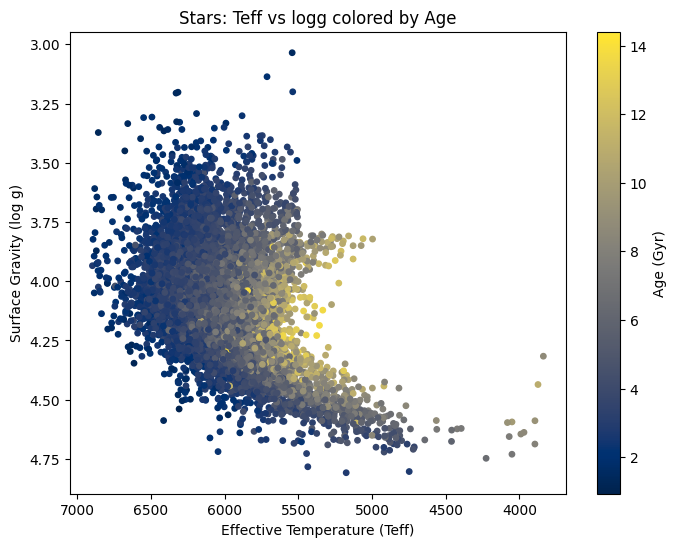

In [144]:
# a)

plt.figure(figsize=(8,6))
sc = plt.scatter(teff, logg, c=age, cmap='cividis', s=15, alpha=1)
plt.colorbar(sc, label='Age (Gyr)')  # Add colorbar showing age
plt.xlabel('Effective Temperature (Teff)')
plt.ylabel('Surface Gravity (log g)')
plt.title('Stars: Teff vs logg colored by Age')
plt.gca().invert_xaxis()  # Common for HR diagrams
plt.gca().invert_yaxis()  # Higher logg at bottom
plt.show()

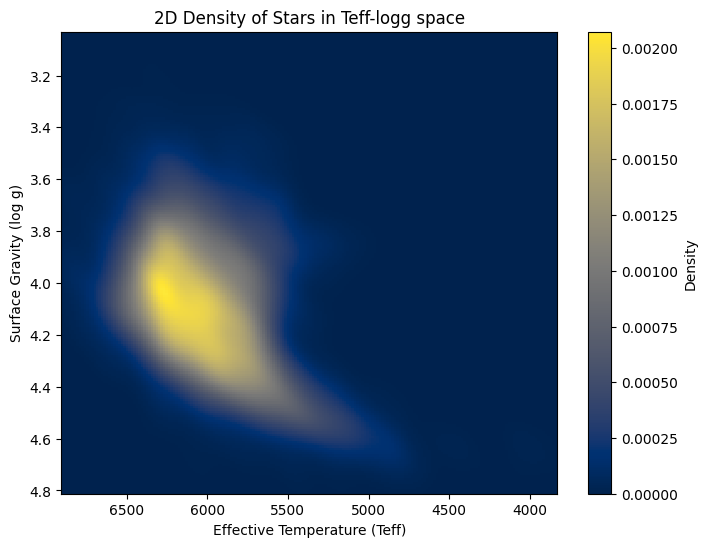

In [145]:
# b)

from scipy.stats import gaussian_kde

# Stack the coordinates
xy = np.array([teff, logg])
# print(xy)

# Compute the KDE
kde = gaussian_kde(xy)

# Create a grid over the data
teff_grid = np.linspace(teff.min(), teff.max(), 200)
logg_grid = np.linspace(logg.min(), logg.max(), 200)
T, G = np.meshgrid(teff_grid, logg_grid)
positions = np.array([T.ravel(), G.ravel()])

# Evaluate the KDE on the grid
Z = kde(positions)
Z = Z.reshape(T.shape)

# Plot
plt.figure(figsize=(8,6))
pcm = plt.pcolormesh(T, G, Z, shading='auto', cmap='cividis')
plt.colorbar(pcm, label='Density')
plt.xlabel('Effective Temperature (Teff)')
plt.ylabel('Surface Gravity (log g)')
plt.title('2D Density of Stars in Teff-logg space')
plt.gca().invert_xaxis()  # HR diagram convention
plt.gca().invert_yaxis()
plt.show()

### 2) Use a built-in, or hand-written routine to compute the running average of $T_{eff}$ as a function of $log(g)$.  Overplot this average approximation to the distribution of stars.  It should roughly subdivide the sample into cooler and hotter stars at a given value of $log(g)$.

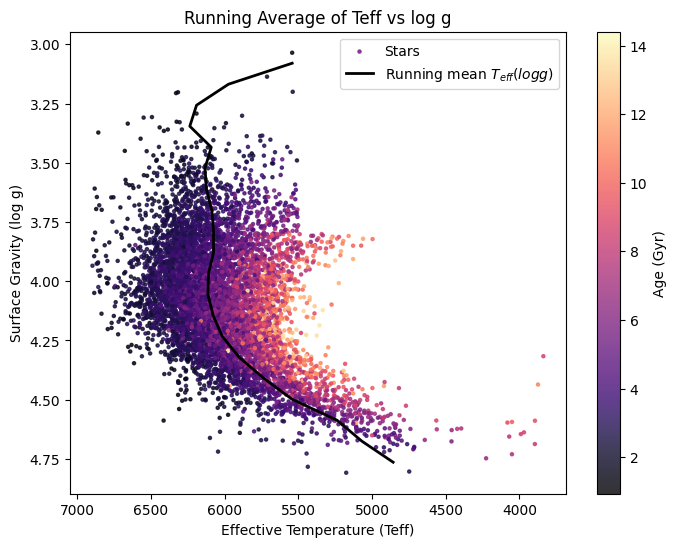

In [146]:
from scipy.stats import binned_statistic

# Define number of bins across logg range
num_bins = 20

# Compute the mean Teff in bins of logg
bin_means, bin_edges, bin_number = binned_statistic(logg, teff, statistic='mean', bins=num_bins)


# Compute bin centers for plotting
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])


# Plot original scatter for context
plt.figure(figsize=(8,6))
sc = plt.scatter(teff, logg, s=5, alpha=0.8, label='Stars', c=age, cmap='magma')


plt.plot(bin_means, bin_centers, color='black', lw=2, label='Running mean $T_{eff}(log g)$')
plt.colorbar(sc, label='Age (Gyr)')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Effective Temperature (Teff)')
plt.ylabel('Surface Gravity (log g)')
plt.title('Running Average of Teff vs log g')
plt.legend()
plt.show()


### 3) [OPTIONAL]  Compute the mean and standard deviation ($\sigma$) of the ages of the cool and hot star sub-samples

* What percent of stars have an age that is within $1-\sigma$ of the mean ages of *both* the cool and hot star sub-samples?  e.g., the fraction of stars that have ages within
 
$(mean(age_{hot}) +\sigma(age_{hot}))$ $\leq age \leq$ $(mean(age_{cool}) -\sigma(age_{cool}))$

In [147]:
# Interpolate running mean data points to get the line dividing cool and hot stars
teff_avg = np.interp(logg, bin_centers, bin_means)


# Define cool and hot group
cool = teff < teff_avg
hot = teff >= teff_avg


print(f"Teff (K):\ncool stars mean: {np.mean(teff[cool]):.2f}, hot stars mean: {np.mean(teff[hot]):.2f}\ncool stars std: {np.std(teff[cool]):.2f}, hot stars std: {np.std(teff[hot]):.2f}\n")

# take the ages of stars in each group and compute mean and std
age_cool = age[cool]
age_hot  = age[hot]

mean_age_cool = np.mean(age_cool)
std_age_cool  = np.std(age_cool)

mean_age_hot  = np.mean(age_hot)
std_age_hot   = np.std(age_hot)

print(f"Age (Gyr):\nCool stars: mean={mean_age_cool:.2f}, σ={std_age_cool:.2f}\nHot stars:  mean={mean_age_hot:.2f}, σ={std_age_hot:.2f}")

lower_limit = mean_age_hot + std_age_hot
upper_limit = mean_age_cool - std_age_cool

mask_between = (age >= lower_limit) & (age <= upper_limit)
fraction_between = np.sum(mask_between) / len(age) * 100

print(f"\nFraction of stars within 1σ of both groups: {fraction_between:.2f}%")


Teff (K):
cool stars mean: 5743.57, hot stars mean: 6208.02
cool stars std: 281.48, hot stars std: 241.51

Age (Gyr):
Cool stars: mean=6.79, σ=2.31
Hot stars:  mean=3.66, σ=1.17

Fraction of stars within 1σ of both groups: 0.00%


### 4) Create two versions of a *weighted* 2D density distribution of the sample of stars in the plane of **[Fe/H]** as a function of **age**:
* a) One where the density distribution is weighted by the mass of the stars
* b) One where the density distribution is weighted by the luminosity of the stars

Compute the weighted average metallicity and age for both cases and indicate them on the density distributions.

Weighted 2D Density of Stars (by mass): Age = 4.89 Gyr, [Fe/H] = -0.05


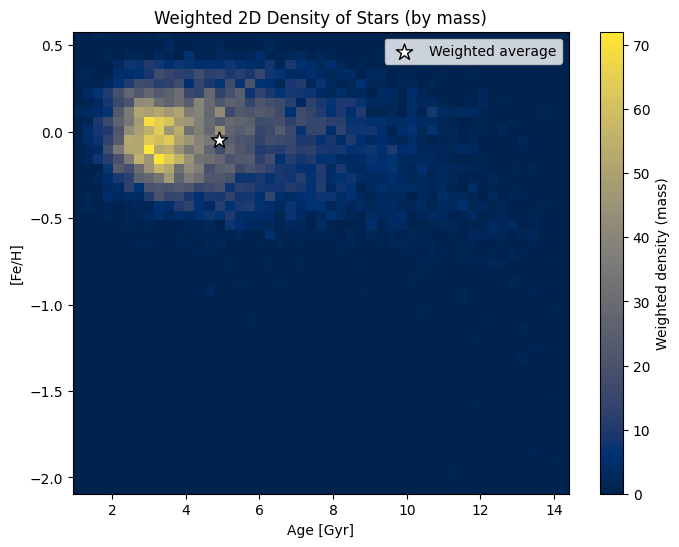

Weighted 2D Density of Stars (by luminosity): Age = 4.15 Gyr, [Fe/H] = -0.03


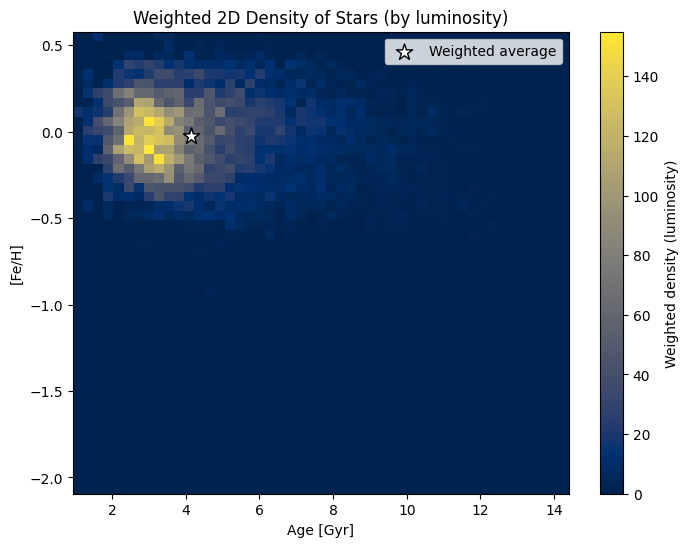

In [148]:
import numpy as np
import matplotlib.pyplot as plt

def plot_weighted_density(x, y, weights, title, colorbar_label):
    """
    Plot a 2D weighted density and mark the weighted average.
    
    Parameters:
    - x, y: data arrays
    - weights: weights for each point
    - bins: [x_bins, y_bins]
    - title: plot title
    - colorbar_label: label for the colorbar
    """
    # Bins definition
    age_bins = np.linspace(np.min(age), np.max(age), 50)
    feh_bins = np.linspace(np.min(feh), np.max(feh), 50)
    bins = [age_bins, feh_bins]

    # Compute weighted 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=bins, weights=weights)
    X, Y = np.meshgrid(xedges, yedges)
    
    # Weighted averages
    avg_x = np.average(x, weights=weights)
    avg_y = np.average(y, weights=weights)
    print(f"{title}: Age = {avg_x:.2f} Gyr, [Fe/H] = {avg_y:.2f}")
    
    # Plot
    plt.figure(figsize=(8,6))
    plt.pcolormesh(X, Y, H.T, cmap='cividis')
    plt.colorbar(label=colorbar_label)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('[Fe/H]')
    plt.title(title)
    
    # Mark weighted average
    plt.scatter(avg_x, avg_y, color='white', s=150, marker='*', edgecolors='black', label='Weighted average')
    plt.legend()
    plt.show()

# Plot weighted by mass
plot_weighted_density(age, feh, mass,
                      title='Weighted 2D Density of Stars (by mass)', 
                      colorbar_label='Weighted density (mass)')

# Plot weighted by luminosity
plot_weighted_density(age, feh, lum,
                      title='Weighted 2D Density of Stars (by luminosity)', 
                      colorbar_label='Weighted density (luminosity)')
